# Testing the model

Using your solution so far, test the model on new data.

The new data is located in the ‘Bank_data_testing.csv’.

Good luck!

## Import the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

## Load the data

Load the ‘Bank_data.csv’ dataset.

In [3]:
data = pd.read_csv('Bank_data.csv', index_col='Unnamed: 0')
data.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,518.000000,518.000000,518.000000,518.000000,518.000000,518.000000,518
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,259
mean,2.835776,0.034749,0.266409,0.388031,0.127413,382.177606,NaN
std,1.876903,0.183321,0.442508,0.814527,0.333758,344.295990,NaN
min,0.635000,0.000000,0.000000,0.000000,0.000000,9.000000,NaN
25%,1.042750,0.000000,0.000000,0.000000,0.000000,155.000000,NaN
50%,1.466000,0.000000,0.000000,0.000000,0.000000,266.500000,NaN
75%,4.956500,0.000000,1.000000,0.000000,0.000000,482.750000,NaN


In [4]:
data['y'], unique = pd.factorize(data['y'])

In [5]:
data.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.334,0.0,1.0,0.0,0.0,117.0,0
1,0.767,0.0,0.0,2.0,1.0,274.0,1
2,4.858,0.0,1.0,0.0,0.0,167.0,0
3,4.120,0.0,0.0,0.0,0.0,686.0,1
4,4.856,0.0,1.0,0.0,0.0,157.0,0


### Declare the dependent and independent variables

Use 'duration' as the independet variable.

In [6]:
x1 = data['duration']
y = data['y']

### Simple Logistic Regression

Run the regression and graph the scatter plot.

In [7]:
x = sm.add_constant(x1)
reg = sm.Logit(y, x)
reg_results = reg.fit()

Optimization terminated successfully.
         Current function value: 0.546118
         Iterations 7


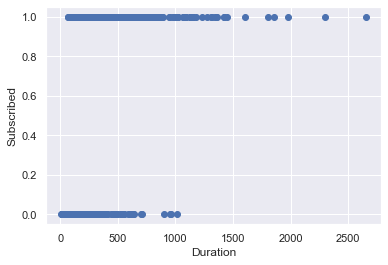

In [10]:
plt.scatter(x1, y)

plt.xlabel('Duration')
plt.ylabel('Subscribed')

plt.show()

## Expand the model

We can be omitting many causal factors in our simple logistic model, so we instead switch to a multivariate logistic regression model. Add the ‘interest_rate’, ‘march’, ‘credit’ and ‘previous’ estimators to our model and run the regression again. 

### Declare the independent variable(s)

In [15]:
new_x1 = data[['duration', 'interest_rate', 'march', 'credit', 'previous']]
new_x = sm.add_constant(x1)

In [18]:
new_reg = sm.Logit(y, new_x)
new_reg_results = new_reg.fit()

Optimization terminated successfully.
         Current function value: 0.336664
         Iterations 7


### Confusion Matrix

Find the confusion matrix of the model and estimate its accuracy. 

<i> For convenience we have already provided you with a function that finds the confusion matrix and the model accuracy.</i>

In [13]:
def confusion_matrix(data,actual_values,model):
        
        # Confusion matrix 
        
        # Parameters
        # ----------
        # data: data frame or array
            # data is a data frame formatted in the same way as your input data (without the actual values)
            # e.g. const, var1, var2, etc. Order is very important!
        # actual_values: data frame or array
            # These are the actual values from the test_data
            # In the case of a logistic regression, it should be a single column with 0s and 1s
            
        # model: a LogitResults object
            # this is the variable where you have the fitted model 
            # e.g. results_log in this course
        # ----------
        
        #Predict the values using the Logit model
        pred_values = model.predict(data)
        # Specify the bins 
        bins=np.array([0,0.5,1])
        # Create a histogram, where if values are between 0 and 0.5 tell will be considered 0
        # if they are between 0.5 and 1, they will be considered 1
        cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
        # Calculate the accuracy
        accuracy = (cm[0,0]+cm[1,1])/cm.sum()
        # Return the confusion matrix and 
        return cm, accuracy

In [19]:
confusion_matrix(new_x, y, new_reg_results)

(array([[218.,  41.],
        [ 30., 229.]]),
 0.862934362934363)

## Test the model

Load the test data from the ‘Bank_data_testing.csv’ file provided. (Remember to convert the outcome variable ‘y’ into Boolean). 

### Load new data 

In [21]:
test = pd.read_csv('Bank_data_testing.csv', index_col='Unnamed: 0')
test.describe(include='all')

,interest_rate,credit,march,may,previous,duration,y
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222
unique,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,NaN,NaN,NaN,NaN,NaN,111
mean,2.922095,0.031532,0.274775,0.346847,0.099099,398.860360,NaN
std,1.891766,0.175144,0.447410,0.755950,0.299470,410.565798,NaN
min,0.639000,0.000000,0.000000,0.000000,0.000000,6.000000,NaN
25%,1.049250,0.000000,0.000000,0.000000,0.000000,144.750000,NaN
50%,1.714000,0.000000,0.000000,0.000000,0.000000,255.500000,NaN
75%,4.960000,0.000000,1.000000,0.000000,0.000000,525.250000,NaN


In [22]:
test['y'], unique = pd.factorize(test['y'])
test.head()

,interest_rate,credit,march,may,previous,duration,y
0,1.313,0.0,1.0,0.0,0.0,487.0,0
1,4.961,0.0,0.0,0.0,0.0,132.0,0
2,4.856,0.0,1.0,0.0,0.0,92.0,0
3,4.120,0.0,0.0,0.0,0.0,1468.0,1
4,4.963,0.0,0.0,0.0,0.0,36.0,0


### Declare the dependent and the independent variables

In [28]:
test_x1 = test.drop(['y'], axis=1)
test_y = test['y']

test_x = sm.add_constant(test_x1)

In [29]:
test_x = test_x[x.columns.values]
test_x.head()

,const,duration,interest_rate,march,credit,previous
0,1.0,487.0,1.313,1.0,0.0,0.0
1,1.0,132.0,4.961,0.0,0.0,0.0
2,1.0,92.0,4.856,1.0,0.0,0.0
3,1.0,1468.0,4.120,0.0,0.0,0.0
4,1.0,36.0,4.963,0.0,0.0,0.0


Determine the test confusion matrix and the test accuracy and compare them with the train confusion matrix and the train accuracy.

In [30]:
confusion_matrix(test_x, test_y, new_reg_results)

(array([[93., 18.],
        [13., 98.]]),
 0.8603603603603603)